In [154]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [157]:
cancer_dataset = pd.read_csv('../Dataset/dataset.csv')

In [158]:
print(cancer_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5121 entries, 0 to 5120
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5121 non-null   int64  
 1   diagnosis                5121 non-null   object 
 2   radius_mean              5121 non-null   float64
 3   texture_mean             5121 non-null   float64
 4   perimeter_mean           5121 non-null   float64
 5   area_mean                5121 non-null   float64
 6   smoothness_mean          5121 non-null   float64
 7   compactness_mean         5121 non-null   float64
 8   concavity_mean           5121 non-null   float64
 9   concave points_mean      5121 non-null   float64
 10  symmetry_mean            5121 non-null   float64
 11  fractal_dimension_mean   5121 non-null   float64
 12  radius_se                5121 non-null   float64
 13  texture_se               5121 non-null   float64
 14  perimeter_se            

In [159]:
cancer_dataset = cancer_dataset.drop(columns='id', axis=1)

In [160]:
cancer_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [161]:
cancer_dataset['diagnosis'].value_counts()

B    3213
M    1908
Name: diagnosis, dtype: int64

In [162]:
cancer_dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000,...,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000,5121.000000
mean,14.127292,19.289649,91.969074,654.866061,0.096361,0.104342,0.088799,0.048920,0.181164,0.062800,...,16.269209,25.677245,107.261213,880.563601,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.521295,4.297674,24.279993,351.637418,0.014053,0.052771,0.079658,0.038773,0.027409,0.007055,...,4.829505,6.141494,33.576280,568.927916,0.022815,0.157214,0.208461,0.065681,0.061819,0.018047
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066150,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [163]:
cancer_dataset.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.759695,0.092478,0.080086,0.046058,0.025718,0.174188,0.062868,...,13.379801,23.515070,87.005938,558.868316,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365487,978.365933,0.102899,0.145188,0.160775,0.087990,0.192911,0.062685,...,21.134864,29.318265,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


# Outliers

<AxesSubplot:xlabel='perimeter_mean'>

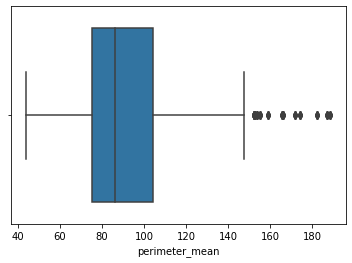

In [164]:
sns.boxplot(x='perimeter_mean', data = cancer_dataset)

## Encoding Categorical Variables

B --> 0

M --> 1

In [165]:
cancer_dataset.replace({'diagnosis': {'B':0, 'M':1}}, inplace=True)

## Data Pre-Processing

Separating the features & Target

In [166]:
x = cancer_dataset.drop(columns='diagnosis', axis=1)

In [167]:
y = cancer_dataset['diagnosis']

In [168]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [169]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

# PCA

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [171]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'Cum variance')

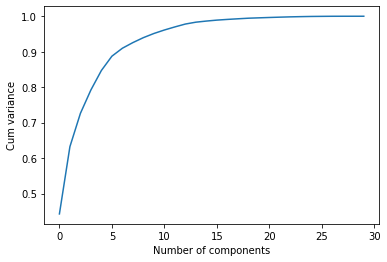

In [172]:
pca_test = PCA(n_components=30)
pca_test.fit(x)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cum variance")

In [173]:
# let's pick 5 components
n_PCA_components = 30
pca = PCA(n_components=n_PCA_components)
principalComponents = pca.fit_transform(x)

In [174]:
principalDf = pd.DataFrame(data=principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [175]:
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.191756,1.951180,-1.121202,3.635474,-1.190781,1.411005,2.157215,-0.393741,-0.160715,-0.878481,...,0.072428,0.073708,0.071146,-0.193395,-0.140196,-0.210224,-0.245506,0.037637,0.046904,-0.047126
1,2.388023,-3.768204,-0.531982,1.116658,0.621471,0.029271,0.017573,0.245422,-0.704383,1.109433,...,-0.074715,-0.081986,-0.233237,0.004236,-0.166776,-0.036795,0.181722,-0.033466,-0.006918,-0.001811
2,5.731694,-1.075188,-0.553857,0.911521,-0.178217,0.539857,-0.666387,0.097960,0.031675,0.453735,...,0.325018,-0.054514,-0.076298,0.113842,0.164680,0.007264,0.048458,-0.049034,0.003412,0.000775
3,7.119229,10.278178,-3.228175,0.156087,-2.962753,3.048785,1.428850,1.069586,-1.377920,-1.112367,...,0.466786,-0.199735,-0.132055,0.157696,0.071073,-0.268798,0.190312,-0.045624,-0.068904,-0.020045
4,3.933303,-1.949355,1.387041,2.939240,0.549438,-1.226619,-0.933753,0.635664,-0.274149,0.379234,...,-0.118578,-0.026139,0.139252,-0.011360,-0.001394,0.041187,0.030944,0.033587,0.004332,0.021162


In [176]:
print('Explained variance per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variance per principal component: [4.42586318e-01 1.89667333e-01 9.38765511e-02 6.60244387e-02
 5.49482003e-02 4.02473332e-02 2.24643555e-02 1.58813379e-02
 1.39531125e-02 1.16931776e-02 9.84212391e-03 8.71213182e-03
 8.10622841e-03 5.24785005e-03 3.14907147e-03 2.67409327e-03
 1.97995194e-03 1.75454049e-03 1.65179926e-03 1.04299950e-03
 1.00179330e-03 9.15456368e-04 8.49307814e-04 6.19718121e-04
 5.20393474e-04 2.73797209e-04 2.31973211e-04 5.44870477e-05
 2.56860798e-05 4.44018066e-06]


In [177]:
print('Amount of information lost due to PCA: ', (1-np.sum(pca.explained_variance_ratio_))*100, '%')

Amount of information lost due to PCA:  -2.220446049250313e-14 %


In [178]:
finalDf = pd.concat([principalDf, cancer_dataset[['diagnosis']]], axis=1)

In [179]:
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel('PC1', fontsize=15)
# ax.set_ylabel('PC2', fontsize=15)
# ax.set_title('5 component PCA', fontsize=20)
# labels = ['M', 'B']
# colors = ['r', 'g']
# for label, color in zip(labels, colors):
#     indicesTopKeep = finalDf['diagnosis'] == label
#     ax.scatter(finalDf.loc[indicesTopKeep, 'PC1'],
#               finalDf.loc[indicesTopKeep, 'PC2'],
#               c = color,
#               s = 50)
# ax.legend(labels)
# ax.grid()

In [180]:
final_x = finalDf.drop(labels = ['diagnosis'], axis=1)

In [181]:
final_y = finalDf['diagnosis']

## Splitting the data into Train & Test data

In [182]:
x_train, x_test, y_train, y_test = train_test_split(final_x, final_y, test_size = 0.2, random_state = 3, stratify = y)

In [183]:
print(final_x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5121, 30)
(4096, 30)
(1025, 30)
(4096,)
(1025,)


In [184]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [185]:
x_train = x_train.reshape(4096, 30, 1)
x_test = x_test.reshape(1025, 30, 1)

## Model Evalution

In [186]:
epochs = 3
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu',))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [187]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_12 (Batc (None, 29, 32)            128       
_________________________________________________________________
dropout_18 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 64)            256       
_________________________________________________________________
dropout_19 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1792)             

In [188]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [189]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data = (x_test, y_test), verbose=1)

Epoch 1/3
128/128 [==============================] - 3s 13ms/step - loss: 0.3815 - accuracy: 0.8706 - val_loss: 0.6147 - val_accuracy: 0.6624
Epoch 2/3
128/128 [==============================] - 1s 9ms/step - loss: 0.1326 - accuracy: 0.9539 - val_loss: 0.1837 - val_accuracy: 0.9015
Epoch 3/3
128/128 [==============================] - 1s 10ms/step - loss: 0.0669 - accuracy: 0.9734 - val_loss: 0.0462 - val_accuracy: 0.9834
